<a href="https://colab.research.google.com/github/varunbv25/karo_startup/blob/main/StartUp_ecosystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Karo StartUp/startup_funding_data.csv')
df.head()

,date,company_name,industry,location,funding_round,amount_raised,lead_investor,co_investors,valuation
0,2021-01-10,Startup_3181,E-Commerce,Beijing,Seed,5.323939e+07,Investor_13,4,1.906080e+08
1,2021-09-16,Startup_2861,Biotech,London,Series A,1.008869e+08,Investor_92,4,1.784413e+07
2,2022-02-20,Startup_4526,Gaming,Toronto,Series A,3.068584e+07,Investor_21,10,3.494444e+08
3,2021-01-04,Startup_4202,EdTech,Berlin,Series D,4.698680e+07,Investor_65,3,2.758408e+08
4,2020-03-01,Startup_2956,CleanTech,Paris,Series C,8.204058e+07,Investor_65,6,2.062123e+07


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

Defining a class for startup ecosystem analysis, which contains __init__ methods to load and analyse the respective data.

In [ ]:
class StartupEcosystemAnalysis:
    def __init__(self, csv_file):
        #Initialize by loading the CSV file into a DataFrame
        self.df = pd.read_csv(csv_file)
        self.df['date'] = pd.to_datetime(self.df['date'], errors='coerce')
        self.df.dropna(subset=['date'], inplace=True)

    def basic_metrics(self):
        #Calculate basic ecosystem metrics.
        total_funding = self.df['amount_raised'].sum()
        unique_companies = self.df['company_name'].nunique()
        average_round_size = self.df['amount_raised'].mean()
        total_deals = len(self.df)
        print(f"Total Funding: ${total_funding:,.2f}")
        print(f"Unique Companies: {unique_companies}")
        print(f"Average Round Size: ${average_round_size:,.2f}")
        print(f"Total Deals: {total_deals}")

    def time_based_analysis(self):
        #Generate a time series plot of funding trends
        self.df['year'] = self.df['date'].dt.year
        yearly_funding = self.df.groupby('year')['amount_raised'].sum()
        plt.figure(figsize=(8, 4))
        sns.lineplot(x=yearly_funding.index, y=yearly_funding.values, marker="o")
        plt.title("Year-over-Year Funding Growth")
        plt.xlabel("Year")
        plt.ylabel("Total Funding (USD)")
        plt.show()

    def funding_trends_analysis(self):
        #Analyze and visualize funding trends by month and deal size trends.
        self.df['month'] = self.df['date'].dt.to_period("M")
        monthly_funding = self.df.groupby('month')['amount_raised'].sum()
        monthly_funding.plot(figsize=(8, 4), color='darkcyan')
        plt.title("Monthly Funding Patterns")
        plt.xlabel("Month")
        plt.ylabel("Total Funding (USD)")
        plt.show()

        # Average deal size trends by funding round
        avg_deal_size = self.df.groupby('funding_round')['amount_raised'].mean()
        avg_deal_size.plot(kind='bar', color='skyblue', figsize=(8, 4))
        plt.title("Average Deal Size by Funding Round")
        plt.xlabel("Funding Round")
        plt.ylabel("Average Deal Size (USD)")
        plt.show()

    def industry_analysis(self):
        #Analyze industry funding distribution and top industries.
        industry_funding = self.df.groupby('industry')['amount_raised'].sum()
        industry_funding.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 4))
        plt.title("Funding Distribution by Industry")
        plt.ylabel("")
        plt.show()

        # Top-performing industries by total funding
        top_industries = industry_funding.sort_values(ascending=False).head(5)
        print("Top Industries by Total Funding:")
        print(top_industries)

    def geographic_analysis(self):
        #Analyze geographic distribution and top locations by funding.
        location_funding = self.df.groupby('location')['amount_raised'].sum().sort_values(ascending=False).head(10)
        plt.figure(figsize=(8, 4))
        sns.barplot(x=location_funding.index, y=location_funding.values, palette="viridis")
        plt.title("Top Locations by Total Funding")
        plt.xlabel("Location")
        plt.ylabel("Total Funding (USD)")
        plt.xticks(rotation=45)
        plt.show()

    def investor_analysis(self):
        #Analyze most active investors and their deal counts.
        top_investors = self.df['lead_investor'].value_counts().head(10)
        plt.figure(figsize=(8, 4))
        sns.barplot(x=top_investors.values, y=top_investors.index, palette="magma")
        plt.title("Top Investors by Deal Counts")
        plt.xlabel("Number of Deals")
        plt.ylabel("Investor")
        plt.show()

    def custom_insight(self):
        #Custom visualization to show interesting patterns - Deal Size by Industry and Location.
        industry_location = self.df.groupby(['industry', 'location'])['amount_raised'].mean().unstack()
        plt.figure(figsize=(8, 4))
        sns.heatmap(industry_location, annot=False, cmap="Blues", linewidths=.5)
        plt.title("Average Deal Size by Industry and Location")
        plt.xlabel("Location")
        plt.ylabel("Industry")
        plt.show()

    def run_all_analysis(self):
        #Run all analysis and visualizations.
        print("Basic Ecosystem Metrics:")
        self.basic_metrics()

        print("\nTime-based Analysis:")
        self.time_based_analysis()

        print("\nFunding Trends Analysis:")
        self.funding_trends_analysis()

        print("\nIndustry Analysis:")
        self.industry_analysis()

        print("\nGeographic Analysis:")
        self.geographic_analysis()

        print("\nInvestor Analysis:")
        self.investor_analysis()

        print("\nCustom Insight:")
        self.custom_insight()

*The methods are explained below:*

**Basic Metrics (basic_metrics method)**: Calculates total funding, unique companies, average round size, and total number of deals.

**Time-based Analysis (time_based_analysis method)**: Plots the year-over-year funding growth using a line plot.

**Funding Trends Analysis (funding_trends_analysis method):**
Plots monthly funding patterns as a time series.
Shows average deal size trends by funding round using a bar chart.

**Industry Analysis (industry_analysis method):**
Pie chart for industry distribution of funding.
Displays top industries by total funding in text format.

**Geographic Analysis (geographic_analysis method):** Bar chart showing top locations by total funding.
Investor Analysis (investor_analysis method): Visualizes the top investors by deal counts using a bar plot.

**Custom Insight (custom_insight method):** Creates a heatmap to analyze average deal size by industry and location.

Basic Ecosystem Metrics:
Total Funding: $101,605,820,767.76
Unique Companies: 928
Average Round Size: $101,605,820.77
Total Deals: 1000

Time-based Analysis:


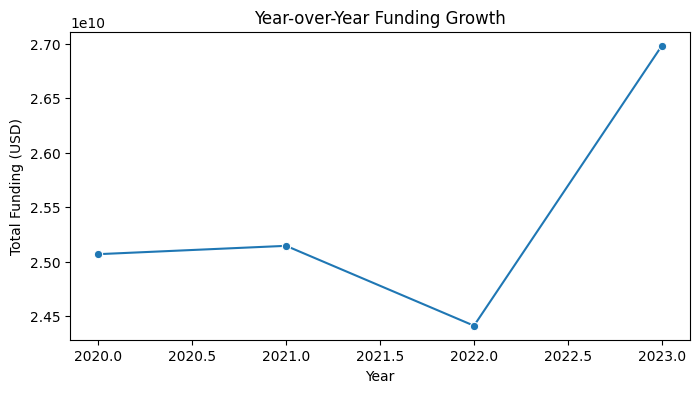


Funding Trends Analysis:


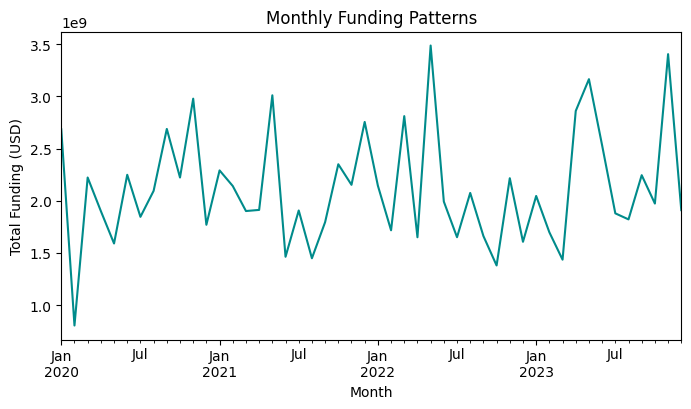

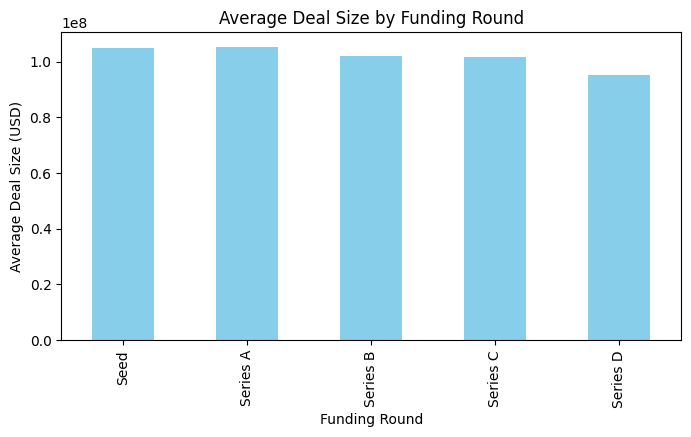


Industry Analysis:


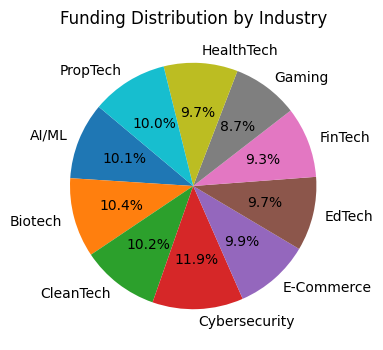

Top Industries by Total Funding:
industry
Cybersecurity    1.211440e+10
Biotech          1.059415e+10
CleanTech        1.040290e+10
AI/ML            1.026323e+10
PropTech         1.019041e+10
Name: amount_raised, dtype: float64

Geographic Analysis:


<ipython-input-14-a2250c1a68b6>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_funding.index, y=location_funding.values, palette="viridis")


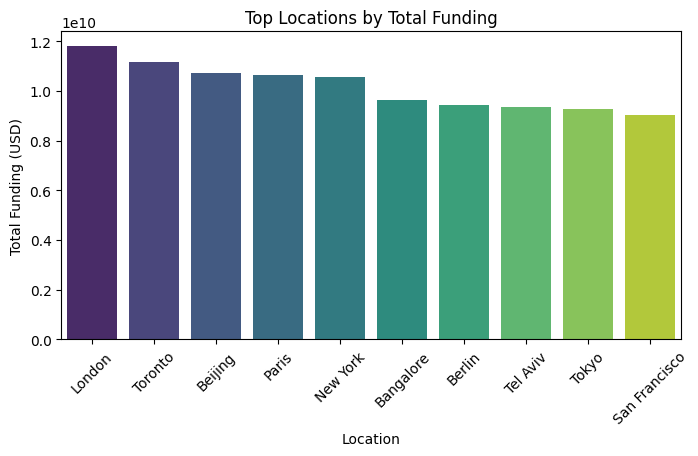


Investor Analysis:


<ipython-input-14-a2250c1a68b6>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_investors.values, y=top_investors.index, palette="magma")


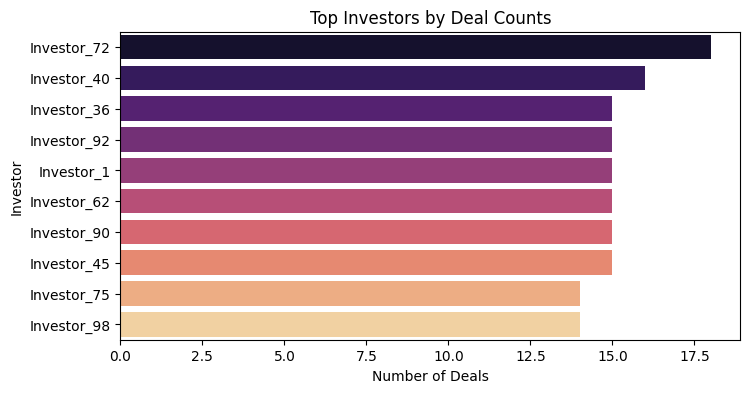


Custom Insight:


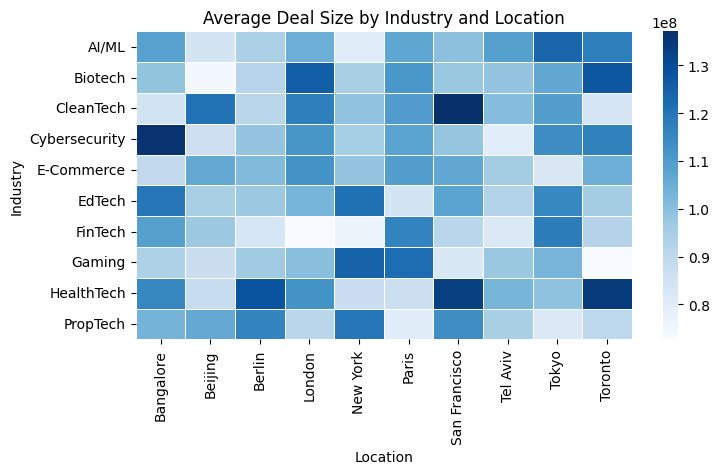

In [ ]:
#to run the above methods
analysis = StartupEcosystemAnalysis("/content/drive/MyDrive/Karo StartUp/startup_funding_data.csv")
analysis.run_all_analysis()